In [42]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv('thanksgiving.csv')
data = data.dropna(subset=['US Region', "What's the age cutoff at your \"kids' table\" at Thanksgiving?"])
data['Kid_Age'] = data["What's the age cutoff at your \"kids' table\" at Thanksgiving?"].apply(lambda x: int(str(x).split(' ')[0]))

In [26]:
regions = data.groupby('US Region')

In [36]:
ages = {}
for region, df in regions:
    df['Kid_Age'] = df["What's the age cutoff at your \"kids' table\" at Thanksgiving?"].apply(lambda x: int(str(x).split(' ')[0]))
    ages[region] = df.Kid_Age.mean()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

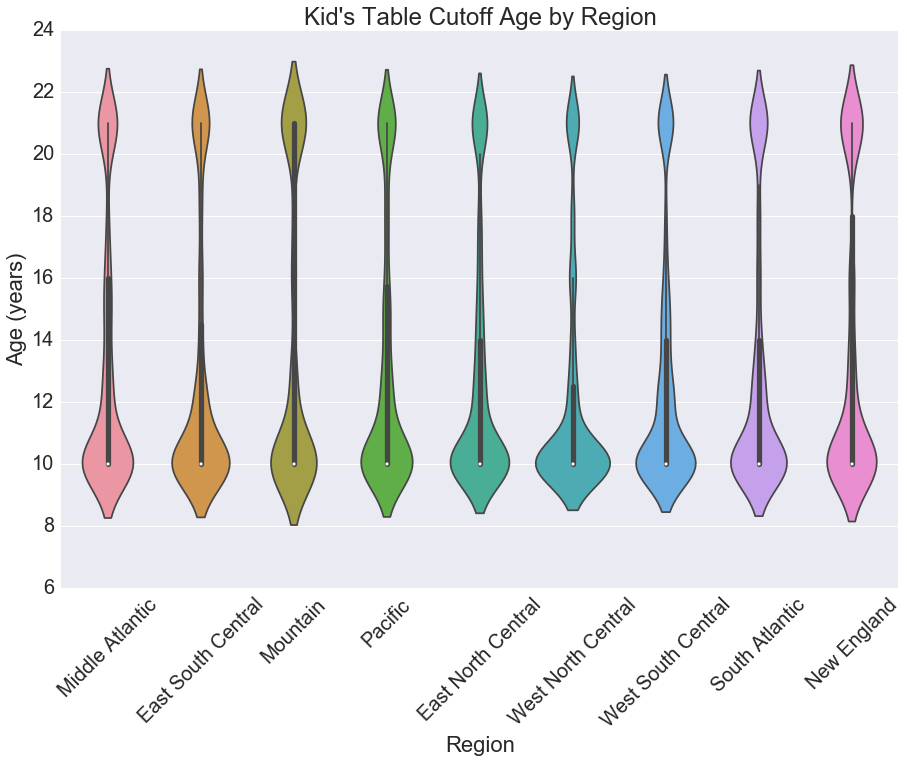

In [77]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
g = sns.violinplot(x="US Region", y="Kid_Age", data=data, bw=0.2)
plt.title("Kid's Table Cutoff Age by Region")
plt.ylabel("Age (years)")
plt.xlabel("Region")
plt.xticks(rotation=45)